In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from scipy.signal import medfilt
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train.shape


(60000, 28, 28)

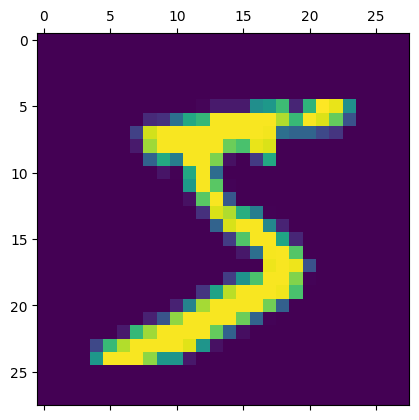

In [ ]:
plt.matshow(x_train[0])

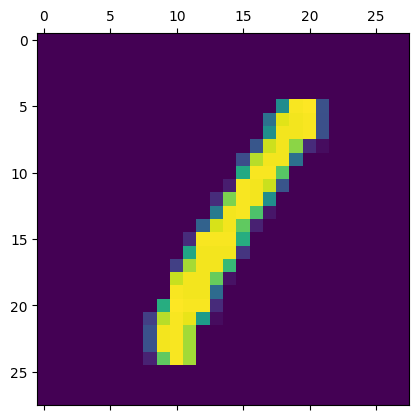

In [ ]:
plt.matshow(x_train[3])

In [ ]:
y_train.shape

(60000,)

In [ ]:
# normalizing and reshaping the dataset to 4D tensors
x_train = x_train.reshape((60000, 28, 28, 1))
x_train =x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test =x_test.astype('float32') / 255

In [ ]:
# Convert the labels to one-hot encoding
y_train = to_categorical(y_train) # Convert the training labels to one-hot encoding
y_test = to_categorical(y_test) # Convert the testing labels to one-hot encoding


In [ ]:
# Print the shapes of the arrays to ensure that they are correct
print("Shape of x_train:", x_train.shape) # Print the shape of the training images
print("Shape of y_train:", y_train.shape) # Print the shape of the training labels
print("Shape of x_test:", x_test.shape) # Print the shape of the testing images
print("Shape of y_test:", y_test.shape) # Print the shape of the testing labels

Shape of x_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)
Shape of x_test: (10000, 28, 28, 1)
Shape of y_test: (10000, 10)


In [ ]:
# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Mean Filtering Algorithm


In [ ]:
# Apply mean filtering to the training, validation, and testing sets
kernel_size = 3
train_images_filtered = np.zeros((x_train.shape[0], 28, 28, 1))
val_images_filtered = np.zeros((val_images.shape[0], 28, 28, 1))
test_images_filtered = np.zeros((x_test.shape[0], 28, 28, 1))


for i in range(x_train.shape[0]):
    train_images_filtered[i] = np.expand_dims(cv2.blur(x_train[i], (kernel_size, kernel_size)), axis=-1)


for i in range(val_images.shape[0]):
    val_images_filtered[i] = np.expand_dims(cv2.blur(val_images[i], (kernel_size, kernel_size)), axis=-1)


for i in range(x_test.shape[0]):
    test_images_filtered[i] = np.expand_dims(cv2.blur(x_test[i], (kernel_size, kernel_size)), axis=-1)

In [ ]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [ ]:
# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train the model on the filtered training set
model.fit(train_images_filtered, y_train, epochs=5, validation_data=(val_images_filtered, val_labels))



Epoch 1/5
1875/1875 [==============================] - 69s 36ms/step - loss: 0.1690 - accuracy: 0.9479 - val_loss: 0.0530 - val_accuracy: 0.9830
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0570 - accuracy: 0.9818 - val_loss: 0.0384 - val_accuracy: 0.9883
Epoch 3/5
1711/1875 [==========================>...] - ETA: 6s - loss: 0.0416 - accuracy: 0.9869

KeyboardInterrupt: ignored

In [ ]:
# Evaluate the model on the filtered testing set
test_loss, test_acc = model.evaluate(test_images_filtered, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 8s 23ms/step - loss: 0.0300 - accuracy: 0.9899
Test accuracy: 0.9898999929428101


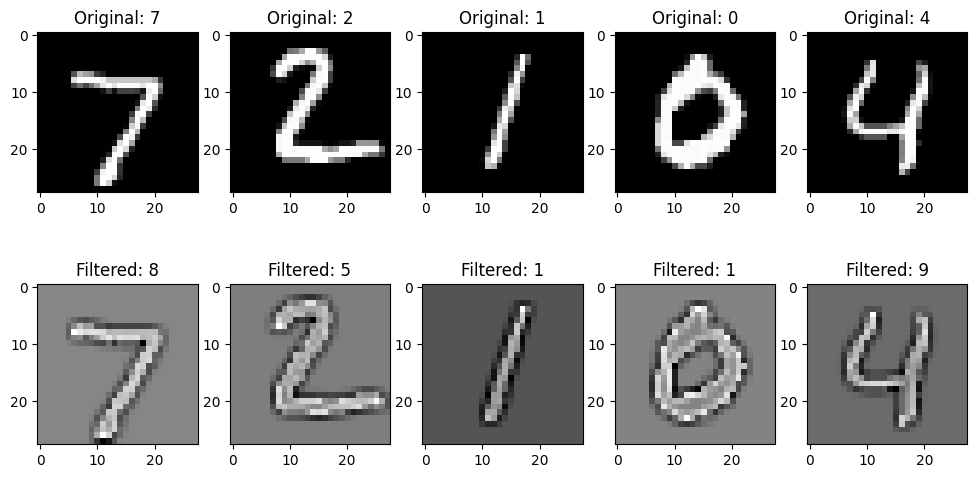

In [ ]:
# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()

Median Filtering Algorithm

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
from scipy.ndimage import median_filter

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Apply the median filter to the test data
X_test_filtered = np.array([median_filter(X_test[i], size=3) for i in range(len(X_test))])

# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2568 - accuracy: 0.9269
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1123 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0769 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0578 - accuracy: 0.9822
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9703


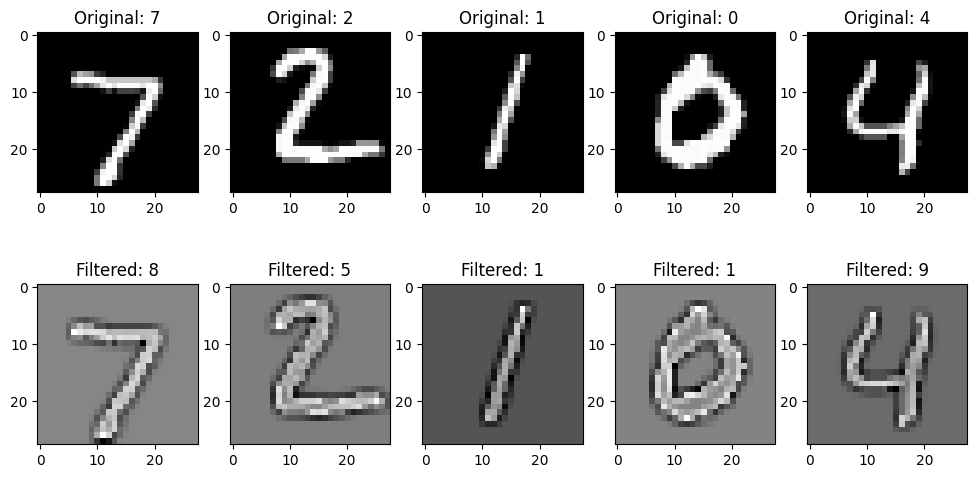

In [ ]:
# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()

Bilateral Filtering Algorithm


In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Apply the bilateral filter to the test data
X_test_filtered = np.zeros(X_test.shape)
for i in range(len(X_test)):
    img_8u = (X_test[i] * 255).astype(np.uint8)
    filtered_img_8u = cv2.bilateralFilter(img_8u, d=15, sigmaColor=0.05, sigmaSpace=15)
    filtered_img = filtered_img_8u.astype(np.float32) / 255
    X_test_filtered[i] = filtered_img
# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2573 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1130 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0783 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0587 - accuracy: 0.9819
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9781


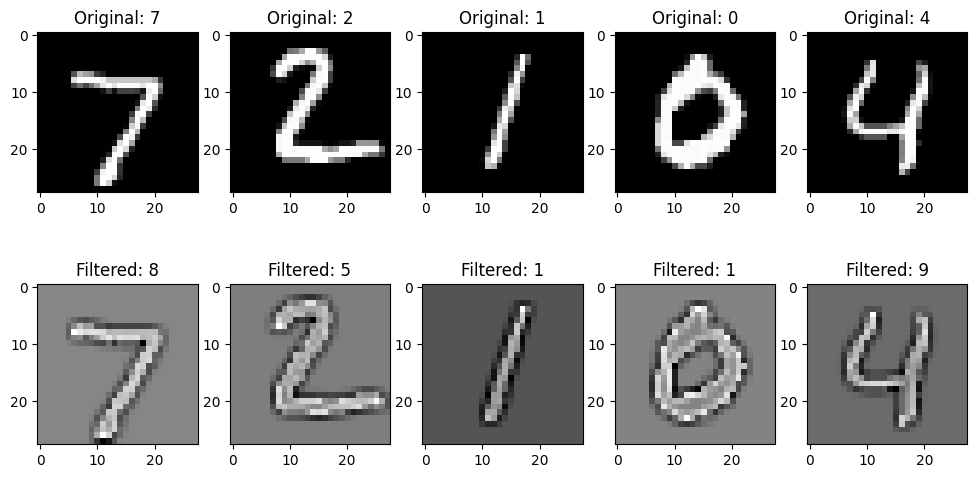

In [ ]:
# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()

Gaussian Filtering Algorithm

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2629 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1168 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0789 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0594 - accuracy: 0.9816
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9641


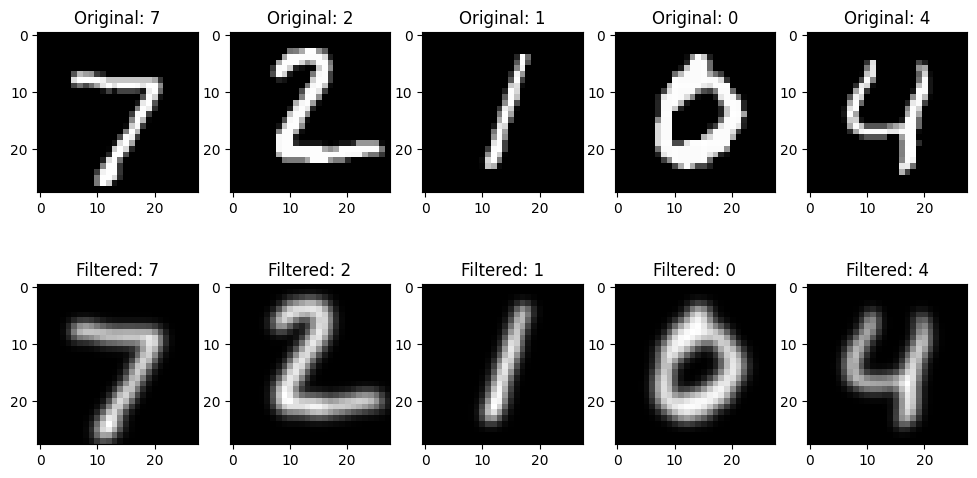

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Apply the Gaussian filter to the test data
from scipy.ndimage import gaussian_filter
X_test_filtered = np.array([gaussian_filter(X_test[i], sigma=1) for i in range(len(X_test))])

# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()


Spatial Filtering Algorithm

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2615 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1171 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0799 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0599 - accuracy: 0.9825
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Accuracy: 0.4336


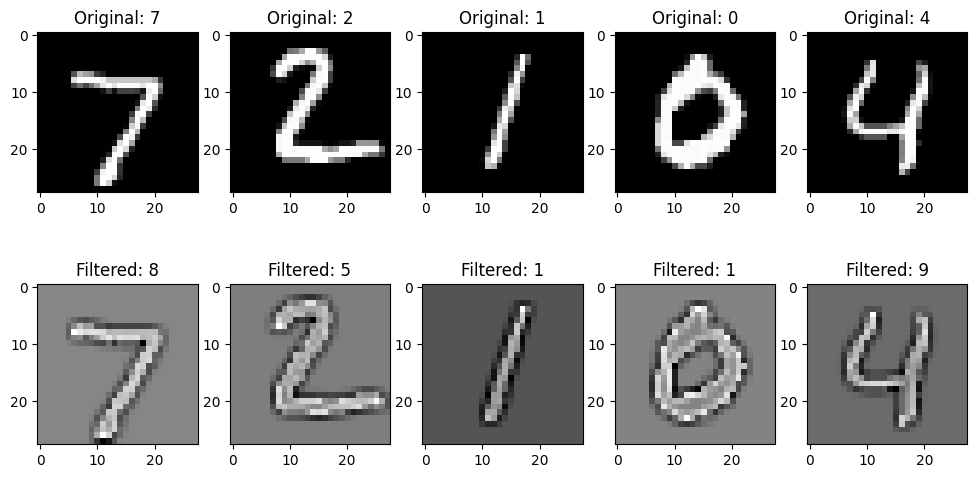

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define the spatial filtering algorithm
def spatial_filter(img):
    # Define kernel for filtering
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], np.float32)

    # Apply filter to image
    filtered_img = cv2.filter2D(img, -1, kernel)

    return filtered_img

# Apply the spatial filter to the test data
X_test_filtered = np.zeros(X_test.shape)
for i in range(len(X_test)):
    filtered_img = spatial_filter(X_test[i])
    X_test_filtered[i] = filtered_img

# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()


Temporal Filtering Algorithm

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define the quadratic filter kernel
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], np.float32)

# Define the spatial filtering algorithm
def spatial_filter(img):
    # Apply filter to image
    filtered_img = cv2.filter2D(img, -1, kernel)

    return filtered_img

# Apply the spatial filter to the test data
X_test_filtered = np.zeros(X_test.shape)
for i in range(len(X_test)):
    filtered_img = spatial_filter(X_test[i])
    X_test_filtered[i] = filtered_img


# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2601 - accuracy: 0.9257
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1165 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0794 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0595 - accuracy: 0.9819
Epoch 5/5
313/313 [==============================] - 1s 1ms/step
Accuracy: 0.107


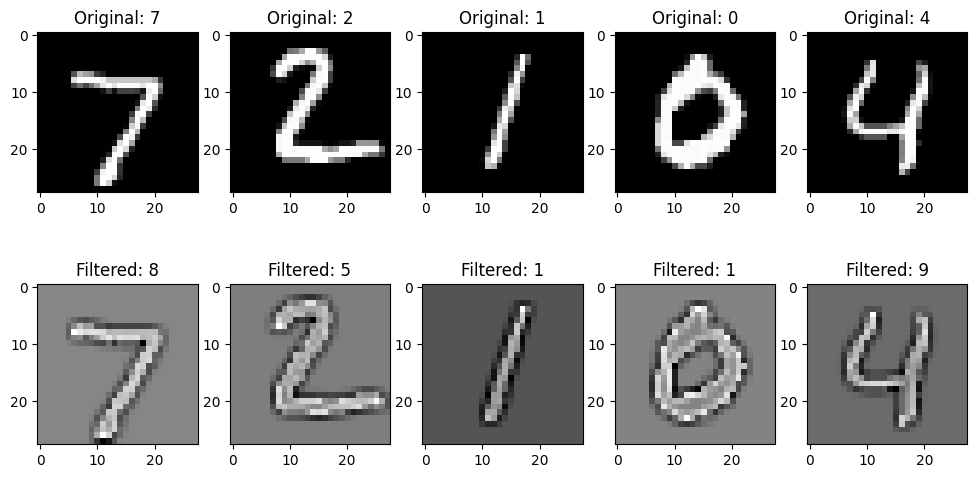

In [ ]:
# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()

Box Blur Filter

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2


# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0


# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)


# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)


# Define the box blur filter
def box_blur_filter(img, kernel_size):
    # Define kernel for filtering
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)


    # Apply filter to image
    filtered_img = cv2.filter2D(img, -1, kernel)


    return filtered_img


# Apply the box blur filter to the test data
X_test_filtered = np.zeros(X_test.shape)
for i in range(len(X_test)):
    filtered_img = box_blur_filter(X_test[i], kernel_size=3)
    X_test_filtered[i] = filtered_img


# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2581 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1129 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0775 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0573 - accuracy: 0.9826
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Accuracy: 0.976


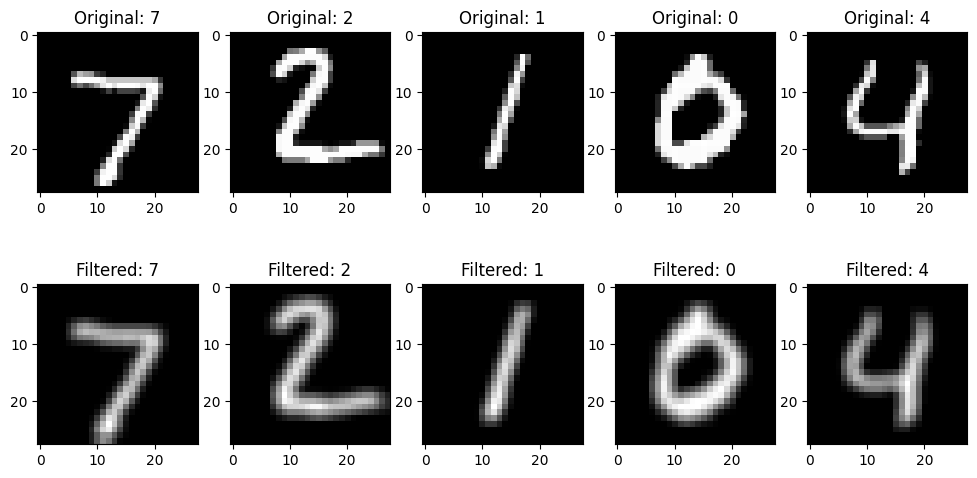

In [ ]:
# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()

Laplace / Mexican Hat Filter

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2577 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1144 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0785 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0600 - accuracy: 0.9820
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Accuracy: 0.0179


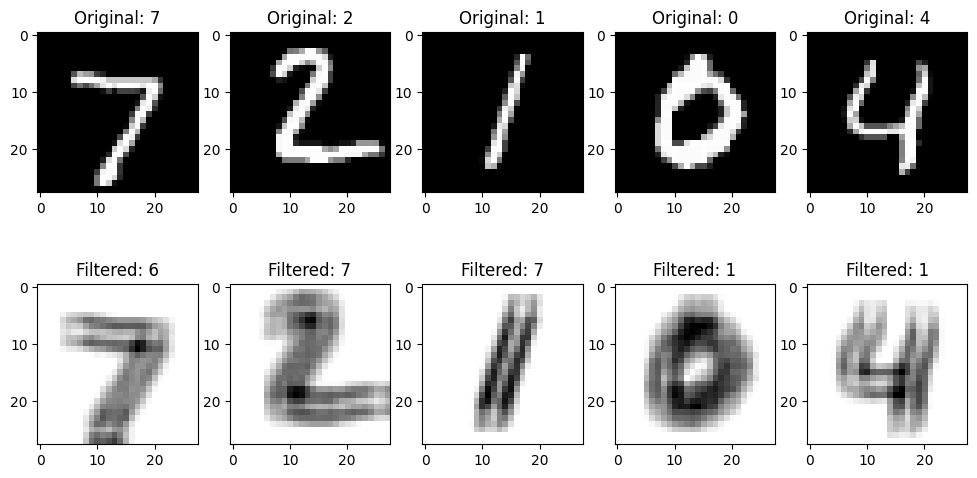

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the Mexican hat filter
def mexican_hat_filter(img):
    # Define kernel for filtering
    kernel_size = 5
    sigma = 1
    x, y = np.meshgrid(np.linspace(-1,1,kernel_size), np.linspace(-1,1,kernel_size))
    d = np.sqrt(x*x+y*y)
    kernel = (2 - (3*d**2) - np.exp(-(d**2)/(2*sigma**2))) / (2 * np.pi * sigma**3)

    # Apply filter to image
    filtered_img = cv2.filter2D(img, -1, kernel)

    return filtered_img

# Apply the Mexican hat filter to the test data
X_test_filtered = np.zeros(X_test.shape)
for i in range(len(X_test)):
    filtered_img = mexican_hat_filter(X_test[i])
    X_test_filtered[i] = filtered_img

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_filtered)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()


Canny Edge Filter

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2612 - accuracy: 0.9263
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1170 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0800 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0593 - accuracy: 0.9817
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Accuracy: 0.7784


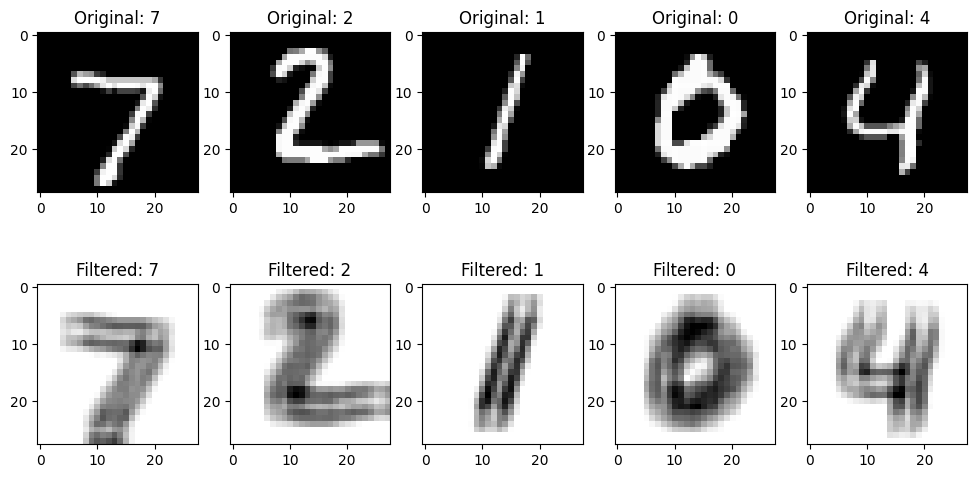

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Define the Canny edge detection filter
def canny_edge_filter(img):
    # Convert image to unsigned 8-bit integer type
    img = np.uint8(img * 255)

    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)

    return edges

# Apply the Canny edge detection filter to the test data
X_test_edges = np.zeros((X_test.shape[0], 28, 28))
for i in range(len(X_test)):
    edges = canny_edge_filter(X_test[i])
    X_test_edges[i] = edges

# Reshape the test data for use with the model
X_test_edges = np.expand_dims(X_test_edges, axis=3)

# Evaluate the accuracy of the model on the filtered test data
y_test_labels = np.argmax(y_test_onehot, axis=1)
y_pred = model.predict(X_test_edges)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

# Visualize images before and after filtering
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i in range(5):
    axs[0, i].imshow(X_test[i], cmap='gray')
    axs[0, i].set_title("Original: {}".format(y_test_labels[i]))
    axs[1, i].imshow(X_test_filtered[i], cmap='gray')
    axs[1, i].set_title("Filtered: {}".format(y_pred_labels[i]))
plt.show()
